In [28]:
import pandas as pd
from xgboost import XGBRegressor

from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
df_original = pd.read_csv('data/train.csv')
test_original = pd.read_csv('data/test.csv')

In [371]:
test_original.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


1. YrSold, SaleType - one hot encoding

In [259]:
# df_original.describe()

In [283]:
# df_original.info()

In [16]:
# from sklearn.model_selection import train_test_split

# df, my_test_data = train_test_split(df_original, test_size=0.2, random_state=0)
# print(df.shape)
# print(my_test_data.shape)

# Remove Outliners

In [378]:
df_out = df_original.copy()
df_out_work = df_out

In [379]:
# df_out_work = df_out.drop( df_out[df_out['SalePrice'] > 450000].index );
# sns.boxplot(df_out_work['SalePrice']);

In [380]:
df_out = df_out_work

# Categorical analisys.

In [381]:
df_na = df_out.copy()
test_na = test_original.copy()

In [405]:
# add year and month as string
df_na['MoSold'] = df_na['MoSold'].astype('str')
test_na['MoSold'] = test_na['MoSold'].astype('str')

In [242]:
categorical = list(df_original.select_dtypes(include=['object']).columns)
# categorical

In [406]:
categorical_with_na = df_na.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
categorical_with_na = categorical_with_na.head(16).sort_values(ascending=True).copy()
categorical_with_na = list(categorical_with_na.index)

In [187]:
def na_analysis(df, feature):
    print("{}, nan - {}".format(feature, df[feature].isnull().sum()) )
    w_df = df.copy()
    print(w_df[feature].unique())
    w_df[feature].fillna('_Na_', inplace=True)

    plt.figure(figsize=(15,5));
    sns.countplot(w_df[feature]);
    t = w_df[[feature, 'SalePrice']]
    print(t[feature].unique())
    plt.figure(figsize=(15,5));
    sns.boxplot(x = t[feature], y = t['SalePrice']);
    

In [208]:
feature_index = 0

In [240]:
# feature_index += 1
# categorical_array = categorical #categories_with_na
# print("{}/{}".format(feature_index+1, len(categorical_array)) )
# feature = categorical_array[feature_index]
# na_analysis(df_na, feature)

In [388]:
categorical_df = df_na.select_dtypes(include=['object'])
categorical_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [389]:
df_na_result = categorical_df.fillna('_Na_', inplace=False)
df_na_result.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,_Na_,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,_Na_,_Na_,_Na_,WD,Normal
1,RL,Pave,_Na_,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,_Na_,_Na_,_Na_,WD,Normal
2,RL,Pave,_Na_,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,_Na_,_Na_,_Na_,WD,Normal
3,RL,Pave,_Na_,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,_Na_,_Na_,_Na_,WD,Abnorml
4,RL,Pave,_Na_,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,_Na_,_Na_,_Na_,WD,Normal


In [394]:

print(conditional_df.shape)
print(df_na_result.shape)

(1460, 43)
(1460, 43)


In [407]:
for feature in categorical_with_na:
    df_na[feature].fillna('_Na_', inplace=True)


In [404]:
df_na.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,_Na_,Reg,Lvl,AllPub,...,0,_Na_,_Na_,_Na_,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,_Na_,Reg,Lvl,AllPub,...,0,_Na_,_Na_,_Na_,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,_Na_,IR1,Lvl,AllPub,...,0,_Na_,_Na_,_Na_,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,_Na_,IR1,Lvl,AllPub,...,0,_Na_,_Na_,_Na_,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,_Na_,IR1,Lvl,AllPub,...,0,_Na_,_Na_,_Na_,0,12,2008,WD,Normal,250000


In [408]:
categorical_with_na = test_na.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
categorical_with_na = categorical_with_na.head(16).sort_values(ascending=True).copy()
categorical_with_na = list(categorical_with_na.index)

In [409]:
for feature in categorical_with_na:
    test_na[feature].fillna('_Na_', inplace=True)

In [410]:
train_predictors = df_na
test_predictors = test_na

one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

In [413]:
final_train.head()
final_df_na = final_train.copy()

# Feature edit.

In [ ]:
# PoolArea - remove

[51 42 50 22 48 41 27 30 38 52 37 26 40 39 36 34 23 35 44 49 28 24 32 33
 20 47 53 45 43 12 46 29 25 19 14 21 17 10 31 13 16 18 11  8  7]
(45,)


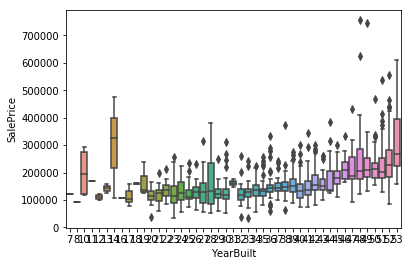

In [319]:
t = df_original.copy()
feature = 'YearBuilt'

def YearBuilt_edit(x):
    return round((x-1850)/3)

t[feature] = t[feature].apply(YearBuilt_edit)

unique_values = t[feature].unique()
print(unique_values)
print(unique_values.shape)
sns.boxplot(x = t[feature], y = t['SalePrice']);

[18  9 17  7 15  8  0  5 19  4  3  6 16 13  2 11 10 12  1 14 20]
(21,)


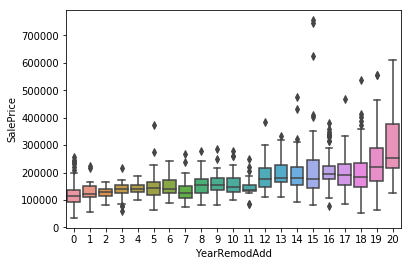

In [365]:
t = df_original.copy()
feature = 'YearRemodAdd'

def YearRemodAdd_edit(x):
    return round((x-1950)/3)

t[feature] = t[feature].apply(YearRemodAdd_edit)

unique_values = t[feature].unique()
print(unique_values)
print(unique_values.shape)
sns.boxplot(x = t[feature], y = t['SalePrice']);

[2008 2007 2006 2009 2010]
(5,)


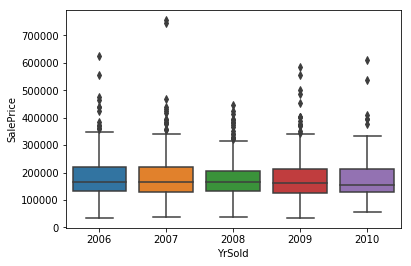

In [372]:
t = df_original.copy()
feature = 'YrSold'

def YrSold_edit(x):
    return x

t[feature] = t[feature].apply(YrSold_edit)

unique_values = t[feature].unique()
print(unique_values)
print(unique_values.shape)
sns.boxplot(x = t[feature], y = t['SalePrice']);

[  5  31   7  91   8  16   3  36  77  69  43   1  46  48  78  40  39   4
  51   6  42   2  59  49  81  88  15  55  57  53  41  24  33  47  89  10
  72  25  52  44   0  87  12  65  34  11  56  95  60  99  14  94  13  45
  97  90  30  76 122  54  62  20  37  68  50  71   9  38  18  58  70  32
  35  83  84  66  19  22  86  98 114  93  75  82  17 106  29  96  27  92
 128  61  67  21  26 108  28  63  73  74  80 115 126 102  85  23 110 117
 129  64 100 111 104 119 127 107 135 109 136 103  79 125]
(122,)


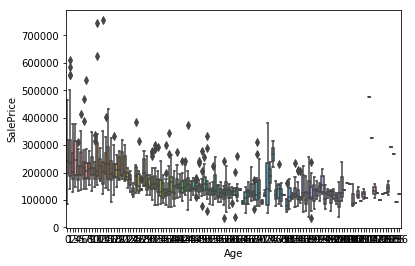

In [416]:
t = final_df_na.copy()

age = final_df_na.YrSold - final_df_na.YearBuilt
feature = 'Age'

def GarageYrBlt_edit(x):
    return round((x)/1)

t[feature] = age.apply(GarageYrBlt_edit)

unique_values = t[feature].unique()
print(unique_values)
print(unique_values.shape)
sns.boxplot(x = t[feature], y = t['SalePrice']);

In [418]:
final_df_na[feature] = age

In [429]:
train_y = final_df_na.SalePrice

In [430]:
train_X = final_df_na.drop(['SalePrice', 'Id'], axis=1)

In [435]:
# %%time
# from sklearn.pipeline import make_pipeline

# from sklearn.impute import SimpleImputer
# from xgboost import XGBRegressor


# my_pipeline = make_pipeline(SimpleImputer(), XGBRegressor())
# my_pipeline.fit(train_X, train_y);

ModuleNotFoundError: No module named 'sklearn.impute'

In [438]:
from sklearn.model_selection import GridSearchCV 

In [439]:
free = GridSearchCV()

TypeError: __init__() missing 2 required positional arguments: 'estimator' and 'param_grid'

In [112]:
td_start.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

(1168, 38)
(292, 38)


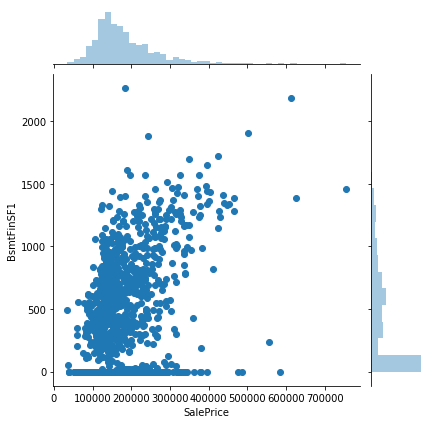

In [116]:
sns.jointplot(x='SalePrice', y='BsmtFinSF1', data=td, kind='scatter');

(1168, 38)
(1168, 38)


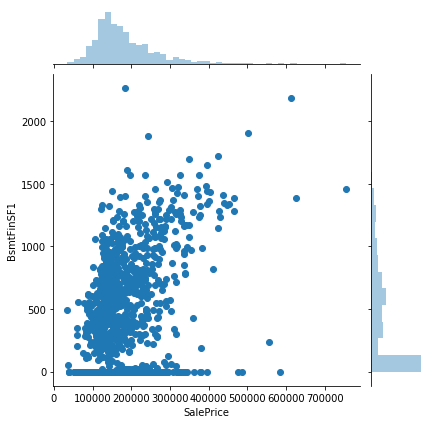

In [117]:
wtd = td.copy()
print(wtd.shape)
td1 = wtd.drop( wtd[wtd['BsmtFinSF1'] > 2300].index )
print(td1.shape)
sns.jointplot(x='SalePrice', y='BsmtFinSF1', data=td1, kind='scatter');

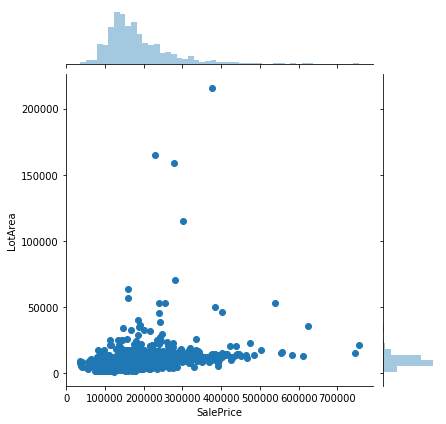

In [76]:
sns.jointplot(x='SalePrice', y='LotArea', data=td_original, kind='scatter');

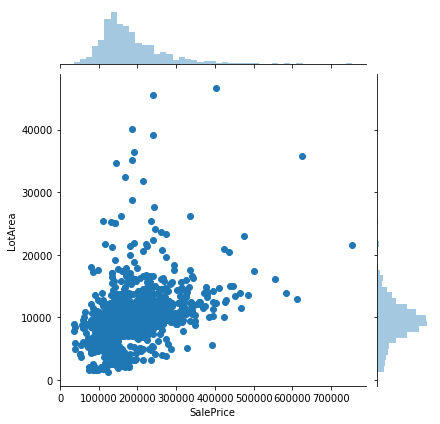

In [118]:
wtd = td1.copy()

td2 = wtd.drop( wtd[wtd['LotArea'] > 50000].index )
sns.jointplot(x='SalePrice', y='LotArea', data=td2, kind='scatter');

(1160, 38)
(11, 38)


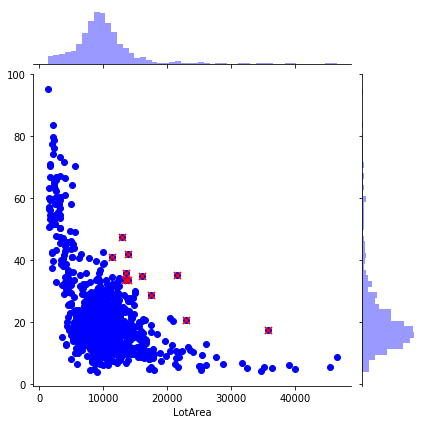

In [119]:
wtd = td2.copy()
print(wtd.shape)

price_per_area = wtd['SalePrice'] / wtd['LotArea']
graph = sns.jointplot(x=wtd['LotArea'], y=price_per_area, color='blue')

drop_threshold = 450000
td_test = wtd.drop( wtd[wtd['SalePrice'] < drop_threshold].index )
print(td_test.shape)

price_per_area = td_test['SalePrice'] / td_test['LotArea']
graph.x = td_test['LotArea']
graph.y = price_per_area
graph.plot_joint(plt.scatter, marker='x', c='r', s=50)

In [120]:
keys_to_fit = ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'YearBuilt', 'LotArea',
               'OverallCond', 'GarageCars', 'TotalBsmtSF', 'KitchenAbvGr', 'BedroomAbvGr',
               'LotFrontage', 'YearRemodAdd', 'ScreenPorch', 'BsmtHalfBath', 'MSSubClass', 
               'BsmtFinSF2', 'BsmtFullBath']

keys_to_fit = ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'YearBuilt', 'LotArea',
               'OverallCond', 'GarageCars', 'TotalBsmtSF', 'KitchenAbvGr', 'LotFrontage',
               'YearRemodAdd', 'ScreenPorch', 'BsmtFinSF2', 'BsmtFullBath']

# keys_to_fit = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
#                'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
#                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
#                'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#                'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
#                'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#                'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#                'MiscVal', 'MoSold', 'YrSold']

# td2[keys_to_fit].hist(figsize=(10, 10), bins=200);

In [121]:
wtd = td2.copy()
td3 = wtd.drop( wtd[wtd['SalePrice'] > drop_threshold].index )
print(td3.shape)

wtd = td3
train_X = wtd[keys_to_fit]
train_y = wtd['SalePrice']

(1149, 38)


In [13]:
%%time
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

my_pipeline = make_pipeline(SimpleImputer(), XGBRegressor())
my_pipeline.fit(train_X, train_y);

NameError: name 'SimpleImputer' is not defined

In [123]:
from sklearn.model_selection import cross_val_score

wtd = td3
X_val = wtd[keys_to_fit]
val_y = wtd['SalePrice']

scores = cross_val_score(my_pipeline, X_val, val_y, scoring='neg_mean_absolute_error', cv=5)
# print(scores * -1)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 15960.319494


In [98]:
keys_to_fit = ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'YearBuilt', 'LotArea',
               'OverallCond', 'GarageCars', 'TotalBsmtSF', 'KitchenAbvGr', 'LotFrontage',
               'YearRemodAdd', 'ScreenPorch', 'BsmtFinSF2', 'BsmtFullBath']
wtd = td3
X_val = wtd[keys_to_fit]
val_y = wtd['SalePrice']

xgb = XGBRegressor()
xgb.fit(X_val, val_y)
xgb.feature_importances_

array([0.08774584, 0.22239032, 0.07564297, 0.11951589, 0.11043873,
       0.07564297, 0.02420575, 0.10590015, 0.01512859, 0.05900151,
       0.03933434, 0.01210287, 0.03782148, 0.01512859], dtype=float32)

In [124]:
from sklearn.metrics import mean_absolute_error

my_test_X = my_test_data[keys_to_fit]
my_test_preds = my_pipeline.predict(my_test_X)
my_test_val_y = my_test_data['SalePrice']

mae = mean_absolute_error(my_test_val_y, my_test_preds)
print(mae)
print('done')

18724.729064105308
done


In [84]:
test_data_path = 'data/test.csv'
test_data = pd.read_csv(test_data_path)
print(test_data.shape)

(1459, 80)


In [85]:
test_X = test_data[keys_to_fit]
test_preds = my_pipeline.predict(test_X)

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
# print(output)
print(test_preds.size)
output.to_csv('output/submission.csv', index=False)
print('done')

1459
done
